In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


<Axes: >

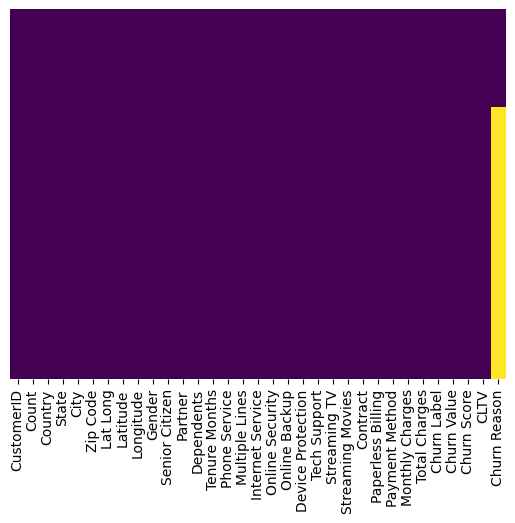

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
data['Total Charges'] = data["Total Charges"].replace(" ", np.nan)
data = data[data["Total Charges"].notnull()]
data = data.reset_index()[data.columns]
data["Total Charges"] = data["Total Charges"].astype(float)

In [9]:
def report(df):
  column = []
  d_type = []
  uniques = []
  n_uniques = []
  
  for i in df.columns:
    column.append(i)
    d_type.append(data[i].dtype)
    uniques.append(data[i].unique()[:5])
    n_uniques.append(data[i].nunique())
  
  return pd.DataFrame({'Column': column, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [10]:
report(data)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7032
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


From the above report we can see few columns like Count, Country and State have one unique value and also we don't need CustomerId to predict Churn, so will remove these colomns.                  

Zip Code, Lat Long, Latitude, Longitude, Churn Label, Churn Score and Churn Reason will also be removed we will keep Churn Lable column for now.

In [11]:
data.drop(['CustomerID', 'Count', 'City', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
                 'Churn Score', 'CLTV', 'Churn Reason'], axis=1, inplace=True)
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1


There are mulitple columns who have values as 'No' and also 'No Internet Service/No Phone Service'. we can use No as in both places so let's change these values.

In [12]:
no_internet_serv_cols = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                         'Streaming TV', 'Streaming Movies']

data['Multiple Lines'].replace('No phone service', 'No', inplace=True)

for i in no_internet_serv_cols:
    data[i].replace('No internet service', 'No', inplace=True)

/tmp/ipykernel_11651/3936910822.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Multiple Lines'].replace('No phone service', 'No', inplace=True)
/tmp/ipykernel_11651/3936910822.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

([<matplotlib.patches.Wedge at 0x75515403f610>,
 [Text(-0.7383052116910712, 0.8154173252941114, 'Yes'),
  Text(0.738305282977118, -0.8154172607494141, 'No')],
 [Text(-0.40271193364967517, 0.4447730865240607, '73.42%'),
  Text(0.40271197253297336, -0.4447730513178622, '26.58%')])

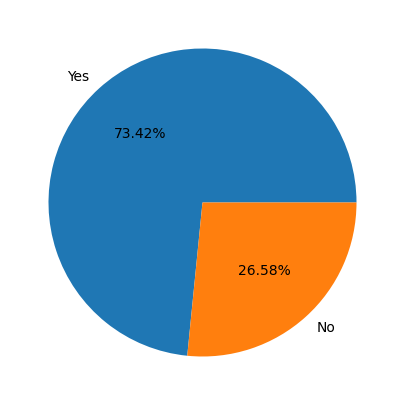

In [13]:
plt.figure(figsize=(10,5))
plt.pie(data['Churn Label'].value_counts(), labels=data['Churn Label'].unique(), autopct='%.2f%%')

In [14]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Churn by Gender')

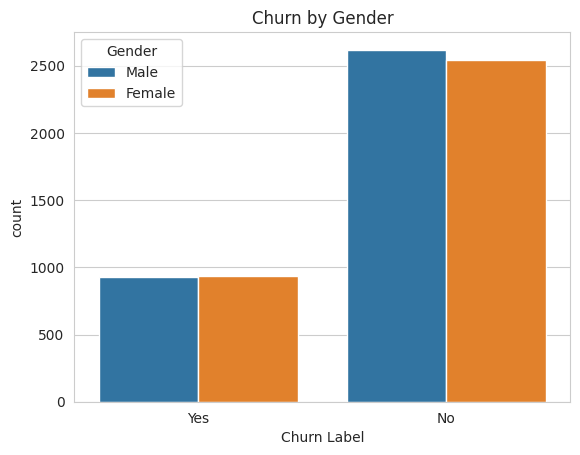

In [15]:
sns.countplot(x='Churn Label',hue='Gender', data=data)
plt.title("Churn by Gender")

The proportion for male and female to churn or retain is almost the same.

Text(0.5, 1.0, 'Churn by Senior Citizen')

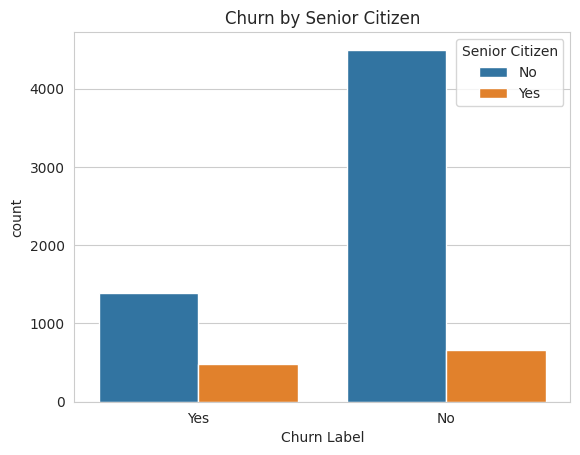

In [16]:
sns.countplot(x='Churn Label',hue='Senior Citizen', data=data)
plt.title("Churn by Senior Citizen")

The churn ratio has high in senior citizens when compared to non-senior citizens.

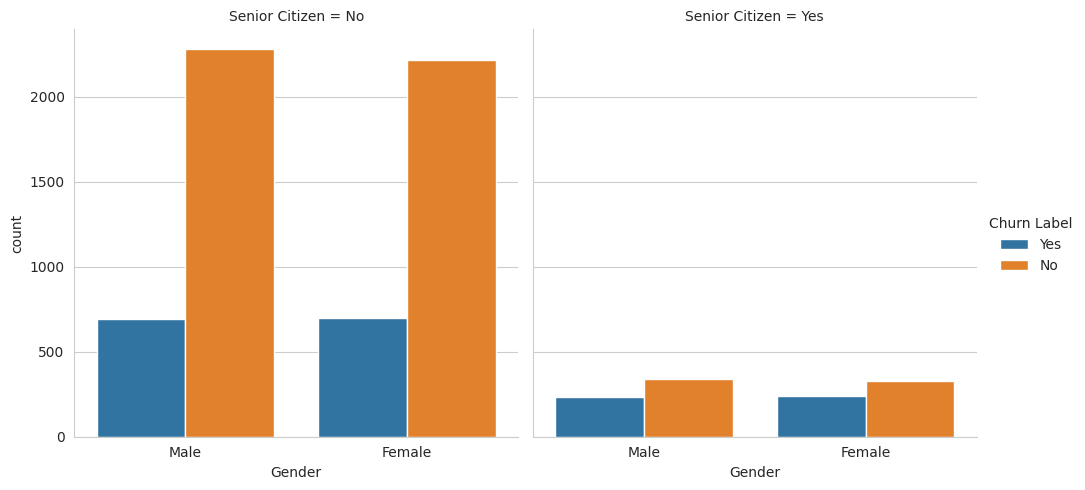

In [17]:
sns.catplot(x='Gender', hue='Churn Label', col='Senior Citizen', kind='count', data=data)

The churn and retain ratio for senior citizens both male and female is almost the same. Similarly, the churn and retain ratio for non-senior citizens.

Text(0.5, 1.0, 'Churn by Partner')

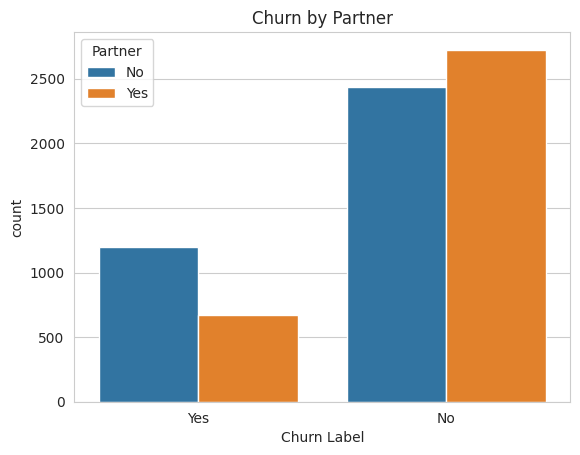

In [18]:
sns.countplot(x='Churn Label',hue='Partner', data=data)
plt.title("Churn by Partner")

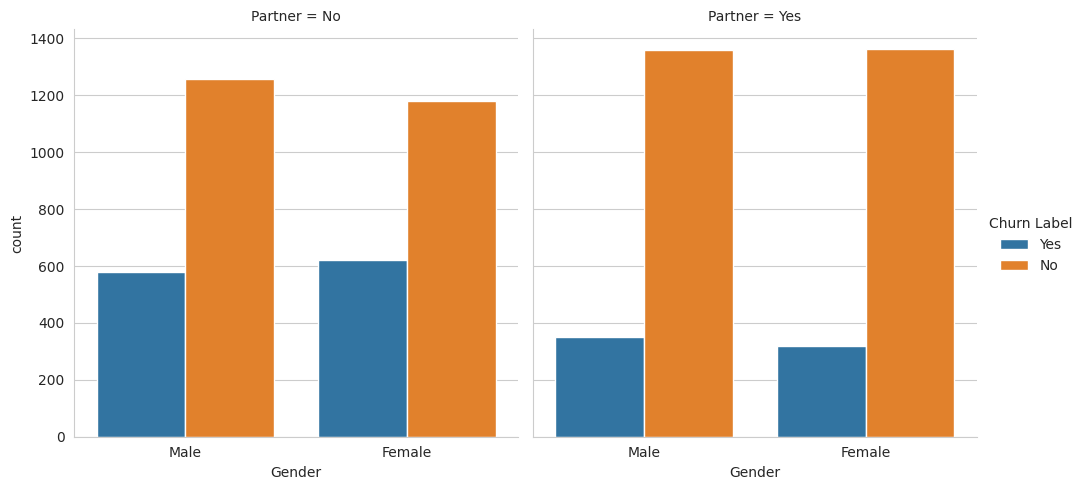

In [19]:
sns.catplot(x='Gender', hue='Churn Label', col='Partner', kind='count', data=data)

Both female and male who do not have a partner are more likely to churn.

Text(0.5, 1.0, 'Churn by Dependents')

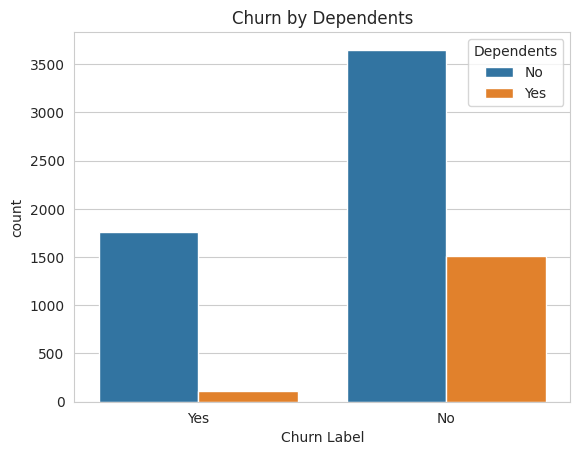

In [20]:
sns.countplot(x='Churn Label',hue='Dependents', data=data)
plt.title("Churn by Dependents")

Customers who don't have depedents are more likely to churn.

Text(0.5, 1.0, 'Churn by Phone Service')

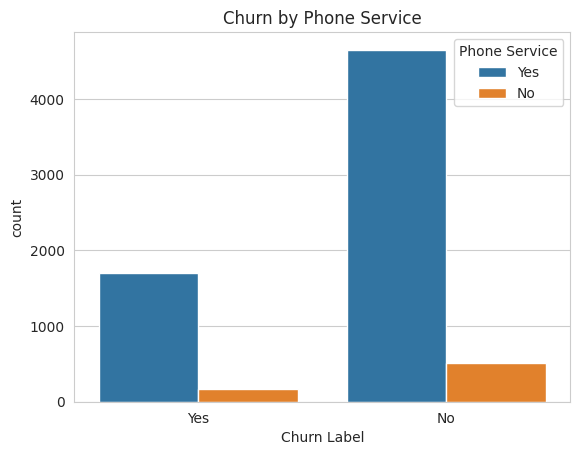

In [21]:
sns.countplot(x='Churn Label',hue='Phone Service', data=data)
plt.title("Churn by Phone Service")

many of the people use phone service

Text(0.5, 1.0, 'Churn by Multiple Lines')

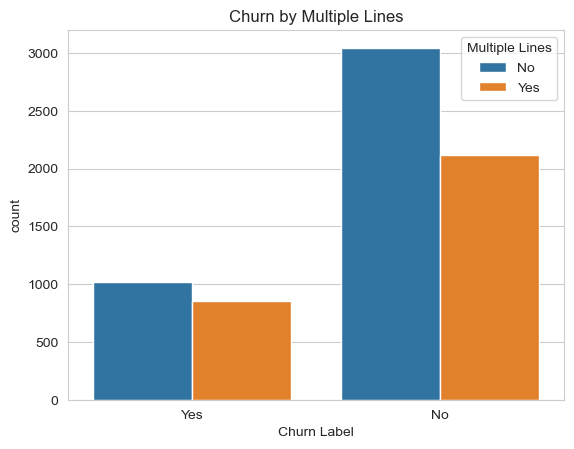

In [178]:
sns.countplot(x='Churn Label',hue='Multiple Lines', data=data)
plt.title("Churn by Multiple Lines")

Text(0.5, 1.0, 'Churn by Internet Service')

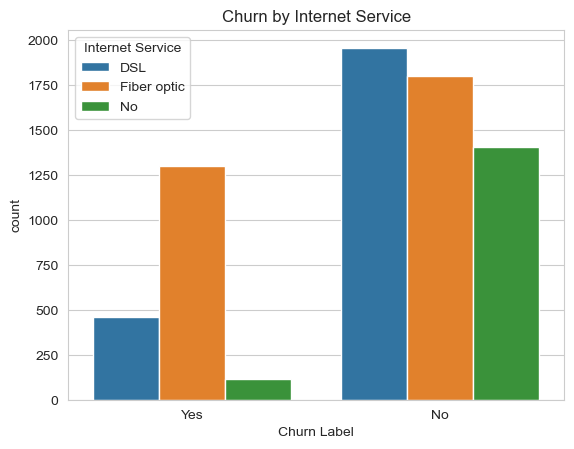

In [179]:
sns.countplot(x='Churn Label',hue='Internet Service', data=data)
plt.title("Churn by Internet Service")

customers with Fiber optic as internet service are most likely to churn

Text(0.5, 1.0, 'Churn by Online Security')

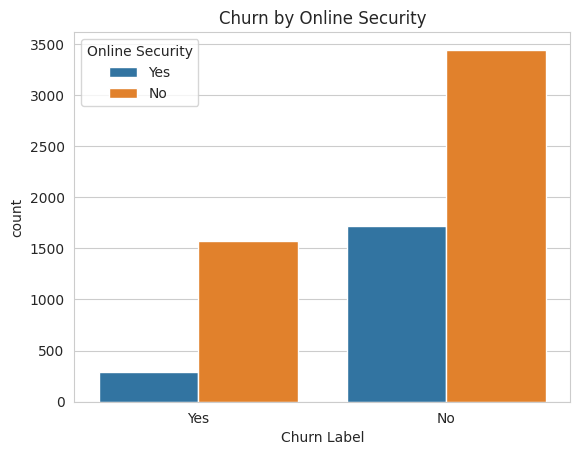

In [22]:
sns.countplot(x='Churn Label',hue='Online Security', data=data)
plt.title("Churn by Online Security")

Customers with no online security are most likely to churn

Text(0.5, 1.0, 'Churn by Online Backup')

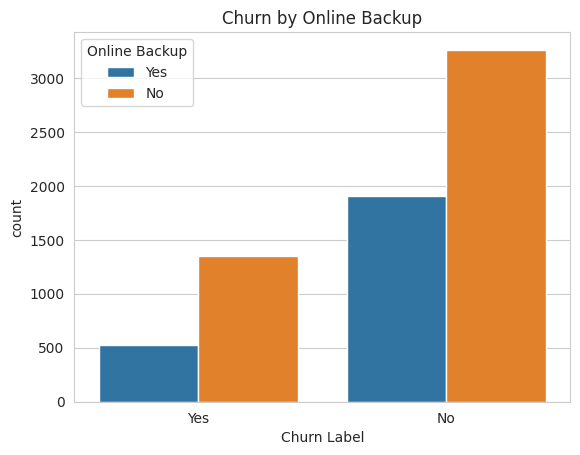

In [23]:
sns.countplot(x='Churn Label',hue='Online Backup', data=data)
plt.title("Churn by Online Backup")

Text(0.5, 1.0, 'Churn by Device Protection')

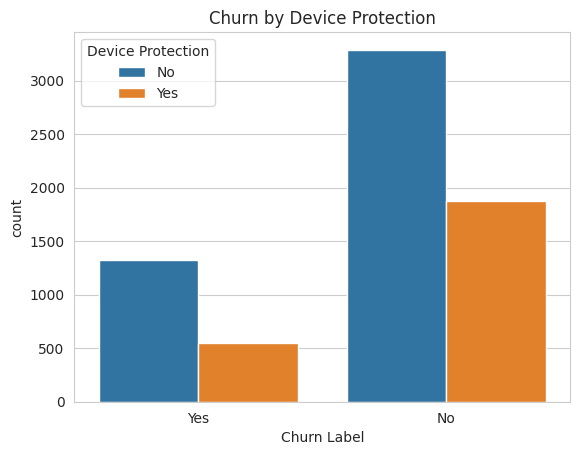

In [24]:
sns.countplot(x='Churn Label',hue='Device Protection', data=data)
plt.title("Churn by Device Protection")

Text(0.5, 1.0, 'Churn by Tech Support')

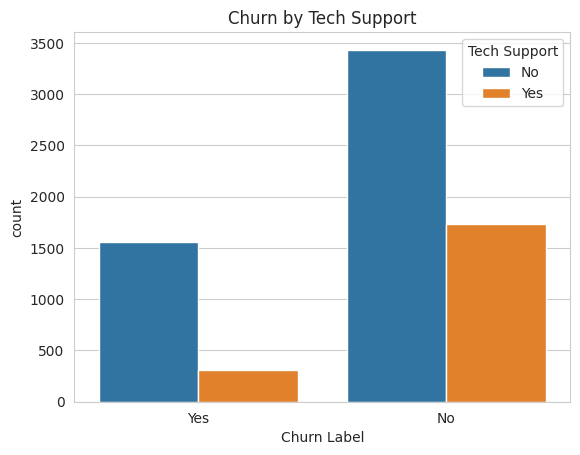

In [25]:
sns.countplot(x='Churn Label',hue='Tech Support', data=data)
plt.title("Churn by Tech Support")

Customers with no tech support are most likely to churn.

Text(0.5, 1.0, 'Churn by Streaming TV')

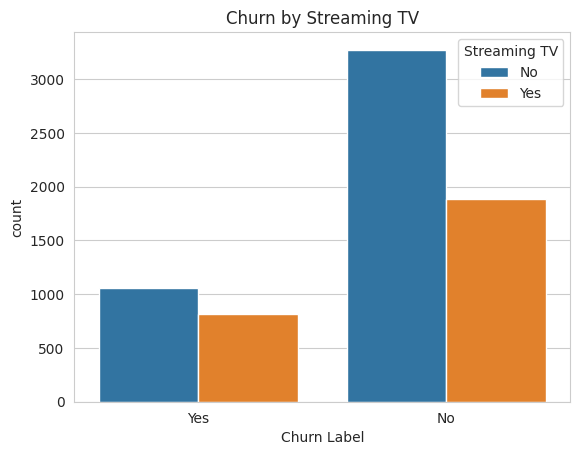

In [26]:
sns.countplot(x='Churn Label',hue='Streaming TV', data=data)
plt.title("Churn by Streaming TV")

Text(0.5, 1.0, 'Churn by Streaming Movies')

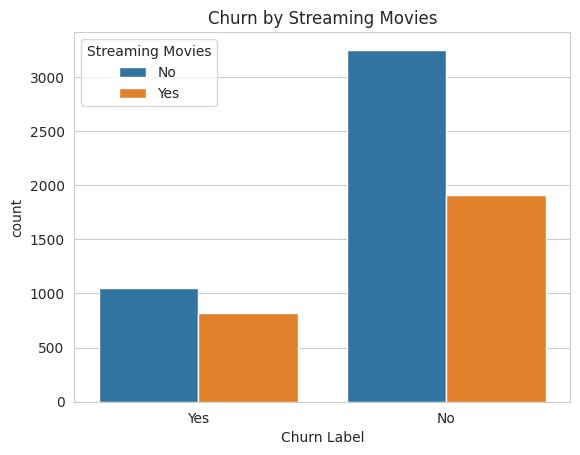

In [27]:
sns.countplot(x='Churn Label',hue='Streaming Movies', data=data)
plt.title("Churn by Streaming Movies")

Text(0.5, 1.0, 'Churn by Contract')

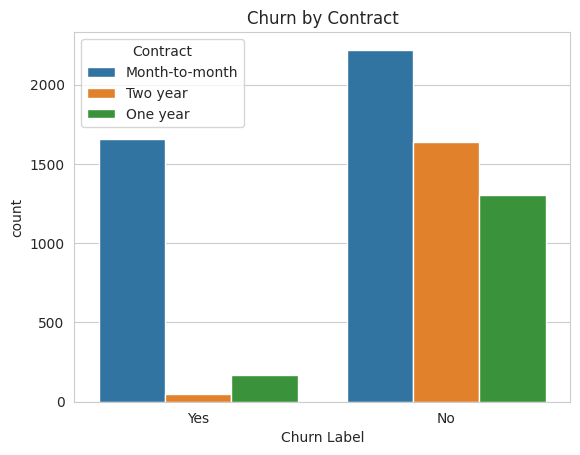

In [28]:
sns.countplot(x='Churn Label',hue='Contract', data=data)
plt.title("Churn by Contract")

Customers with month-to-month contract are most likely to churn.

Text(0.5, 0, 'Tenure Months')

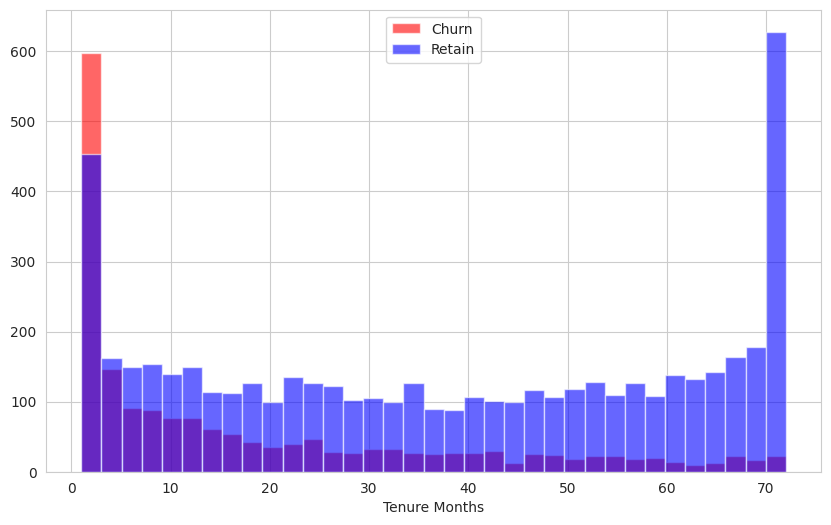

In [29]:
plt.figure(figsize=(10,6))
data[data['Churn Label'] == 'Yes']['Tenure Months'].hist(bins=35,color='red',label='Churn',alpha=0.6)
data[data['Churn Label'] == 'No']['Tenure Months'].hist(bins=35,color='blue',label='Retain',alpha=0.6)
plt.legend()
plt.xlabel('Tenure Months')

Incrase in tenure months decreases the churn probability.

Text(0.5, 0, 'Tenure Months distribution split by Gender')

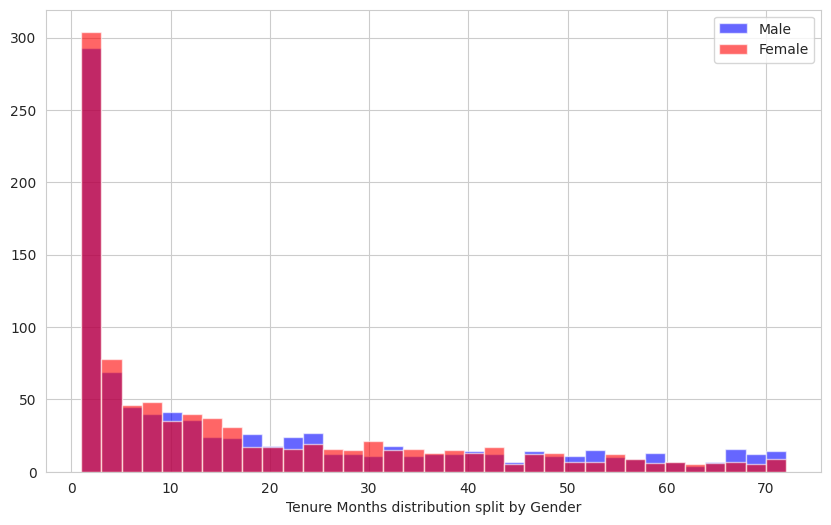

In [30]:
plt.figure(figsize=(10,6))
data[(data['Churn Label'] == 'Yes') & (data['Gender'] == 'Male')]['Tenure Months'].hist(bins=35,color='blue',label='Male',alpha=0.6)
data[(data['Churn Label'] == 'Yes') & (data['Gender'] == 'Female')]['Tenure Months'].hist(bins=35,color='red',label='Female',alpha=0.6)
plt.legend()
plt.xlabel('Tenure Months distribution split by Gender')

Text(0.5, 0, 'Monthly Charges')

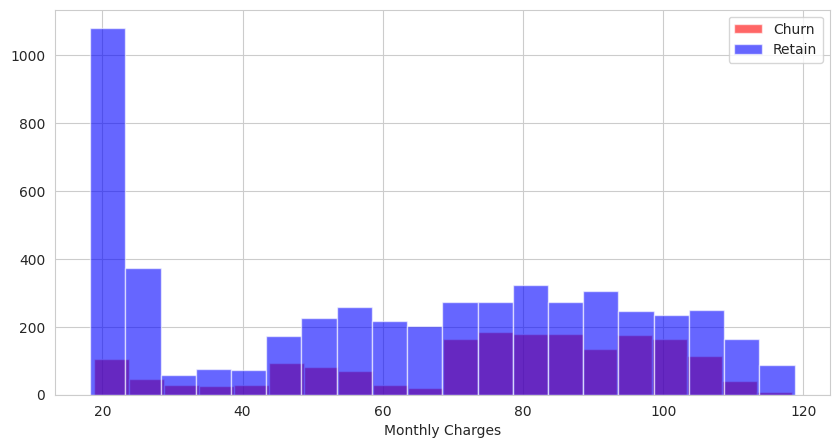

In [31]:
plt.figure(figsize=(10,5))
data[data['Churn Label'] == 'Yes']['Monthly Charges'].hist(bins=20,color='red',label='Churn',alpha=0.6)
data[data['Churn Label'] == 'No']['Monthly Charges'].hist(bins=20,color='blue',label='Retain',alpha=0.6)
plt.legend()
plt.xlabel('Monthly Charges')

Customers retain is peak with monthly trasction around 20$ and churn increses after 70$

Text(0.5, 0, 'Monthly Charges distribution split by Gender')

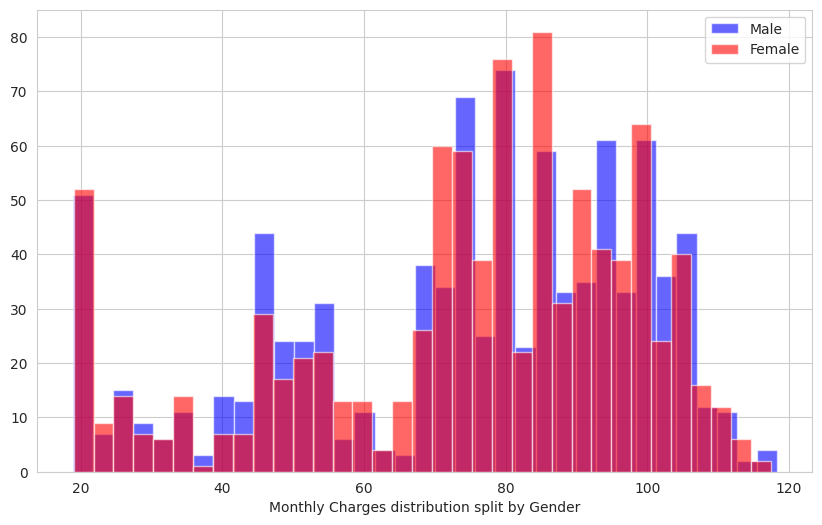

In [32]:
plt.figure(figsize=(10,6))
data[(data['Churn Label'] == 'Yes') & (data['Gender'] == 'Male')]['Monthly Charges'].hist(bins=35,color='blue',label='Male',alpha=0.6)
data[(data['Churn Label'] == 'Yes') & (data['Gender'] == 'Female')]['Monthly Charges'].hist(bins=35,color='red',label='Female',alpha=0.6)
plt.legend()
plt.xlabel('Monthly Charges distribution split by Gender')

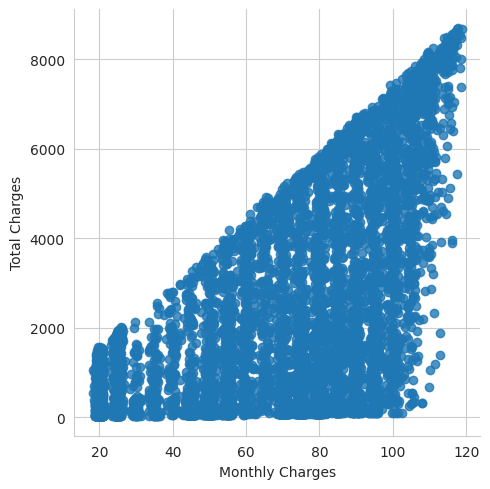

In [33]:
sns.lmplot(data=data, x='Monthly Charges', y='Total Charges', fit_reg=False)

increase in monthly charges increases total charges

([0, 1, 2, 3],
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

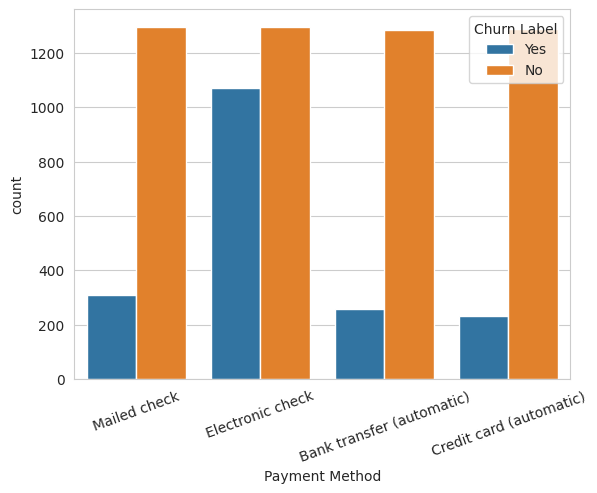

In [34]:
sns.countplot(x='Payment Method', hue='Churn Label', data=data)
plt.xticks(rotation=20)

Customers with electronic check as payment method are most likely to churn

<Axes: xlabel='Paperless Billing', ylabel='count'>

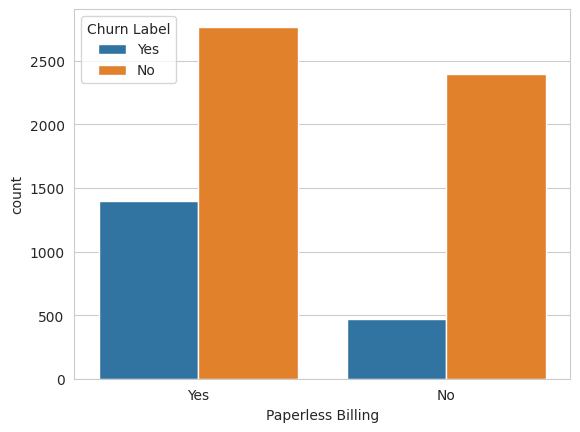

In [35]:
sns.countplot(x='Paperless Billing', hue='Churn Label', data=data)

# model


In [36]:
data.drop(['Churn Label'], axis=1, inplace=True)
data.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value'],
      dtype='object')

In [37]:
y = data['Churn Value']
X = data.drop(['Churn Value'], axis=1)
X.to_csv('first_churn.csv', index=False)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=101)

In [40]:
X_test,X_val,y_test,y_val = train_test_split(X_temp, y_temp, test_size=0.5,random_state=101)

In [41]:
validation_data = pd.concat([X_val, y_val], axis=1)
validation_data.to_csv('validation.csv', index=False)

In [42]:
X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

X_train_dummies.to_csv('dummies-data', index=False)

In [43]:
rfc_model = RandomForestClassifier()

In [44]:
rfc_model.fit(X_train_dummies,y_train)

RandomForestClassifier()

In [45]:
rfc_pred = rfc_model.predict(X_test_dummies)

In [46]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       752
           1       0.68      0.55      0.61       303

    accuracy                           0.80      1055
   macro avg       0.76      0.72      0.74      1055
weighted avg       0.79      0.80      0.79      1055

[[672  80]
 [135 168]]


In [47]:
import pickle

In [48]:
filename = 'rfc_model.sav'

In [49]:
pickle.dump(rfc_model, open(filename, 'wb'))

In [50]:
load_rfc_model = pickle.load(open(filename, 'rb'))

In [51]:
model_score = load_rfc_model.score(X_test_dummies,y_test)
model_score

0.7962085308056872